<a href="https://colab.research.google.com/github/josesg998/redesn_2024/blob/main/Clase%201/Ejercicio_9b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 9
Cree el código necesario para crear las siguientes arquitecturas no lineales acíclicas:
Nota: Las funciones de activación de cada capa no participan de la arquitectura con lo cual
puede elegir cualquier función, incluso usar la misma para todas las capas

## Red a

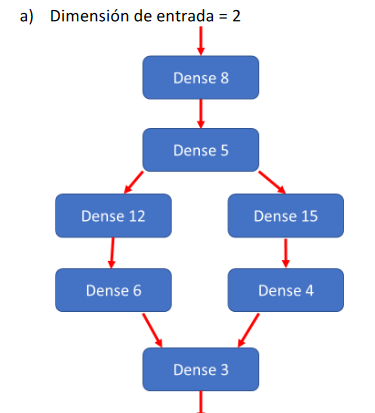

In [1]:
from keras.layers import Dense, Input, concatenate
from keras.models import Model


In [2]:
# Dimensión de entrada
input_dim = 2

# Entrada
input_layer = Input(shape=(input_dim,))

# Capa 1
x = Dense(8, activation='relu')(input_layer)

# Capa 2
x = Dense(5, activation='relu')(x)

# Bifurcación
# Rama Izquierda
left_branch = Dense(12, activation='relu')(x)
left_branch = Dense(6, activation='relu')(left_branch)

# Rama Derecha
right_branch = Dense(15, activation='relu')(x)
right_branch = Dense(4, activation='relu')(right_branch)

# Unión
merged = concatenate([left_branch, right_branch])
output_layer = Dense(3, activation='relu')(merged)

# Definir el modelo
model_a = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model_a.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])

# Resumen del modelo
model_a.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 2)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 8)                    24        ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 5)                    45        ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 12)                   72        ['dense_1[0][0]']             
                                                                                              

In [3]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

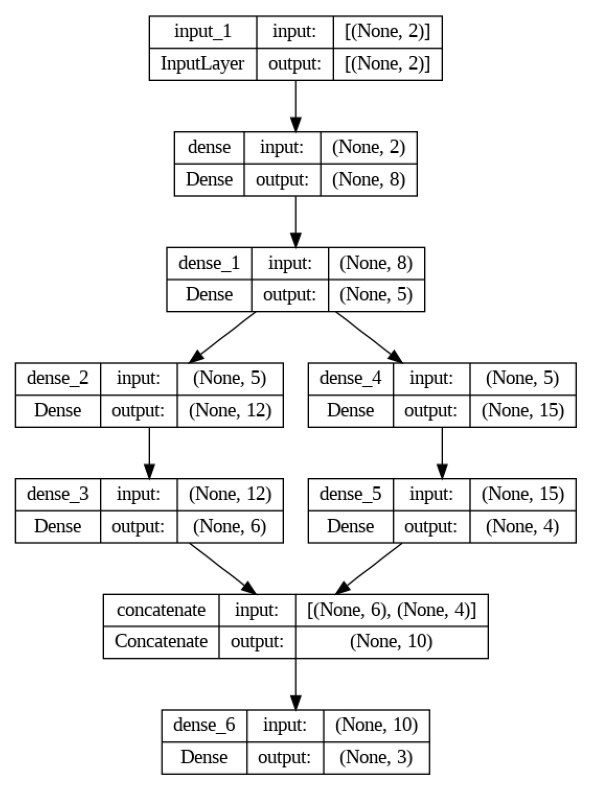

In [4]:
# Graficar la arquitectura de la red
plot_model(model_a, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Mostrar la imagen del modelo usando matplotlib
image = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

## Red b

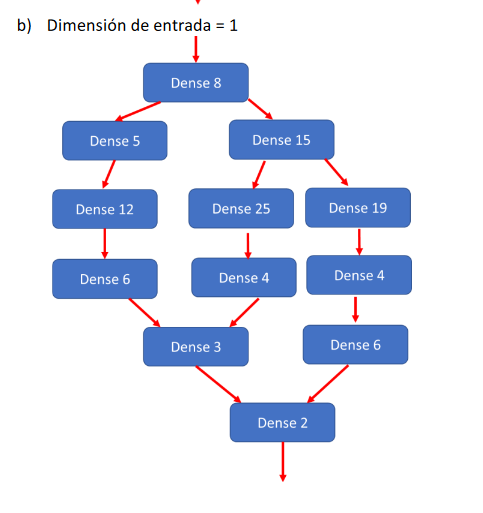

In [5]:
# Dimensión de entrada
input_dim = 1

# Entrada
input_layer = Input(shape=(input_dim,))

# Capa 1
x = Dense(8, activation='relu')(input_layer)

# Bifurcación
# Rama Izquierda
left_branch = Dense(5, activation='relu')(x)
left_branch = Dense(12, activation='relu')(left_branch)
left_branch = Dense(6, activation='relu')(left_branch)

# Rama Derecha
right_branch = Dense(15, activation='relu')(x)

right_right_branch = Dense(19,activation='relu')(right_branch)
right_right_branch = Dense(4,activation='relu')(right_right_branch)
right_right_branch = Dense(6,activation='relu')(right_right_branch)

right_left_branch  = Dense(25,activation='relu')(right_branch)
right_left_branch  = Dense(4,activation='relu')(right_left_branch)

# Unión
merged = concatenate([left_branch, right_left_branch])
output_layer = Dense(3, activation='relu')(merged)

# Unión
merged2 = concatenate([output_layer, right_right_branch])
output_layer2 = Dense(2, activation='relu')(merged2)

# Definir el modelo
model_b = Model(inputs=input_layer, outputs=output_layer2)

# Compilar el modelo
model_b.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])

# Resumen del modelo
model_b.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 8)                    16        ['input_2[0][0]']             
                                                                                                  
 dense_8 (Dense)             (None, 5)                    45        ['dense_7[0][0]']             
                                                                                                  
 dense_11 (Dense)            (None, 15)                   135       ['dense_7[0][0]']             
                                                                                            

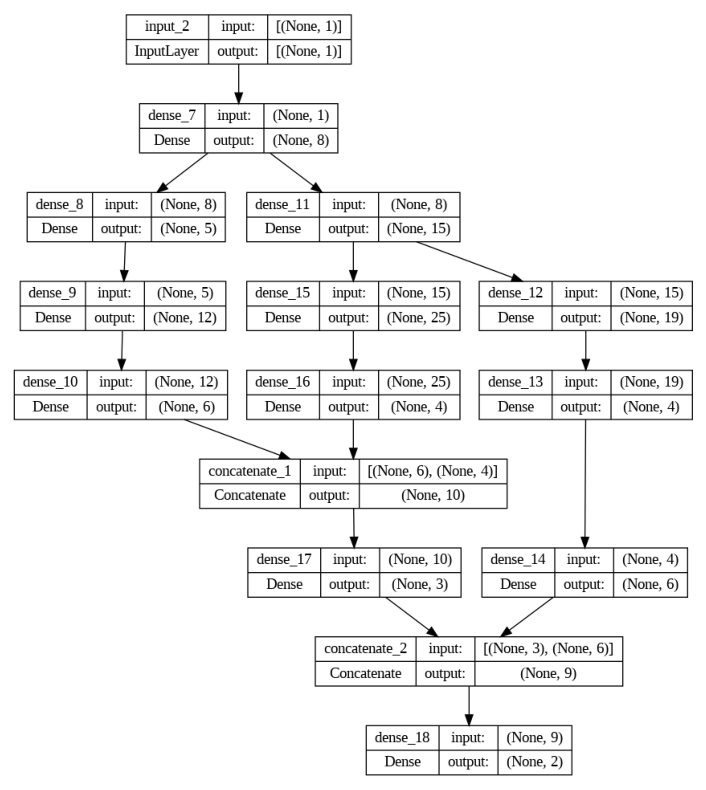

In [6]:
# Graficar la arquitectura de la red
plot_model(model_b, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Mostrar la imagen del modelo usando matplotlib
image = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

## Red c

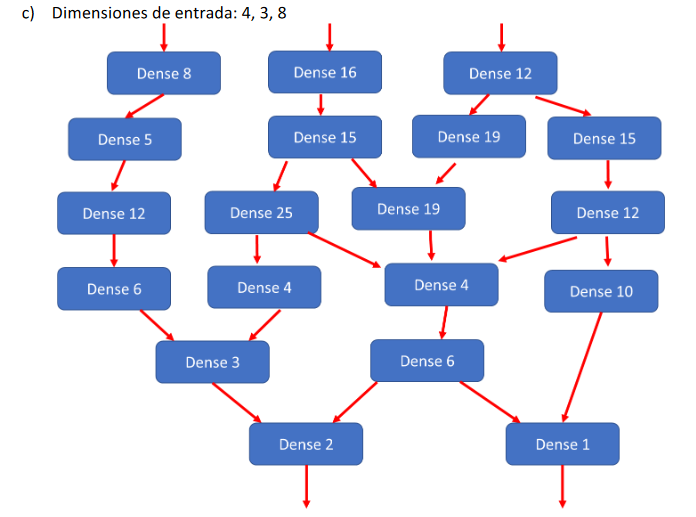

In [7]:
# Dimensión de entrada
input_izq = 4
input_cen = 3
input_der = 8

# Entrada rama izquierda
input_layer_izq = Input(shape=(input_izq,))

left_branch = Dense(8, activation='relu')(input_layer_izq)
left_branch = Dense(5, activation='relu')(left_branch)
left_branch = Dense(12, activation='relu')(left_branch)
left_branch = Dense(6, activation='relu')(left_branch)

# Entrada rama centro
input_layer_cen = Input(shape=(input_cen,))
cen_branch = Dense(16,activation='relu')(input_layer_cen)
cen_branch = Dense(15,activation='relu')(cen_branch)

cen_left_branch = Dense(25,activation='relu')(cen_branch)
cen_left_branch2 = Dense(4,activation='relu')(cen_left_branch)

# combino
penultima_capa_left = Dense(3, activation='relu')(concatenate([left_branch, cen_left_branch2]))

# Entrdada rama derecha
input_layer_der = Input(shape=(input_der,))
right_branch = Dense(12,activation='relu')(input_layer_der)

right_left_branch = Dense(19,activation='relu')(right_branch)

right_right_branch = Dense(15,activation='relu')(right_branch)
right_right_branch = Dense(12,activation='relu')(right_right_branch)
right_right_branch2 = Dense(10,activation='relu')(right_right_branch)


# combino
merge_cen_right_left = Dense(19, activation='relu')(concatenate([cen_branch, right_left_branch]))

merge_three =  Dense(4, activation='relu')(concatenate([cen_left_branch,
                                                        merge_cen_right_left,
                                                        right_right_branch]))
merge_three = Dense(6, activation='relu')(merge_three)


final_left = Dense(2,activation='relu')(concatenate([penultima_capa_left,merge_three]))

final_right = Dense(1,activation='relu')(concatenate([right_right_branch2,merge_three]))

# Definir el modelo
model_c = Model(inputs=[input_layer_izq,input_layer_cen,input_layer_der], outputs=[final_left,final_right])

# Compilar el modelo
model_c.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])

# Resumen del modelo
model_c.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_23 (Dense)            (None, 16)                   64        ['input_4[0][0]']             
                                                                                            

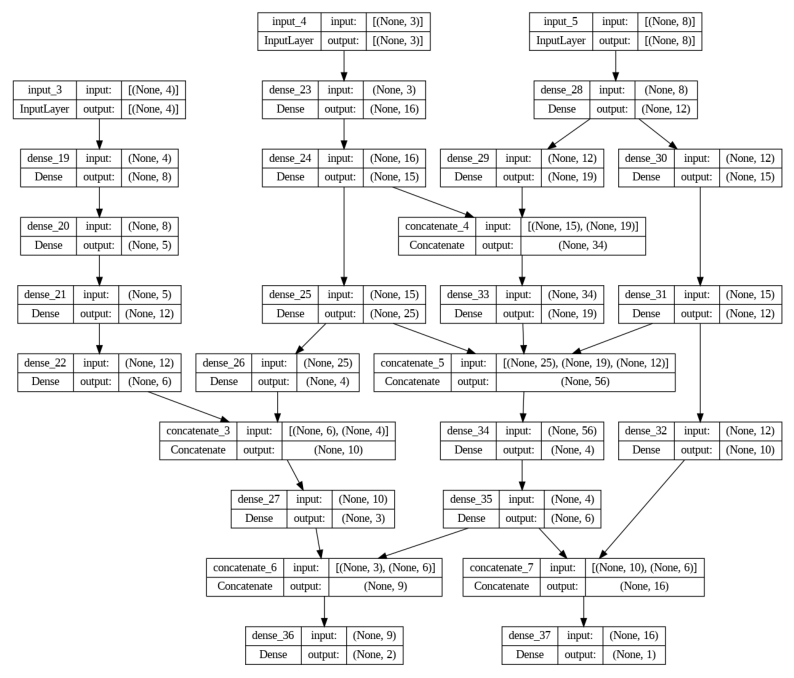

In [8]:
# Graficar la arquitectura de la red
plot_model(model_c, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Mostrar la imagen del modelo usando matplotlib
image = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

## Red d

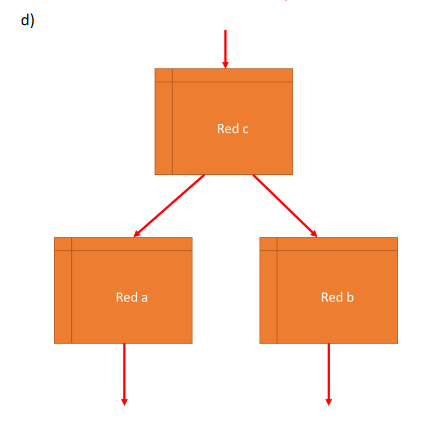

In [13]:
# Crear un modelo que incluya todo el proceso
# El modelo final toma input_layer_c como entrada y las salidas de Red a y Red b como salidas
final_model = Model(inputs=[input_layer_izq,input_layer_cen,input_layer_der],
                    outputs=[model_a(final_left),  # Salida de Red a
                             model_b(final_right)   # Salida de Red b
])

# Compilar el modelo
final_model.compile(optimizer='adam', loss='mse', metrics=['RootMeanSquaredError'])
final_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 3)]                  0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_23 (Dense)            (None, 16)                   64        ['input_4[0][0]']             
                                                                                            

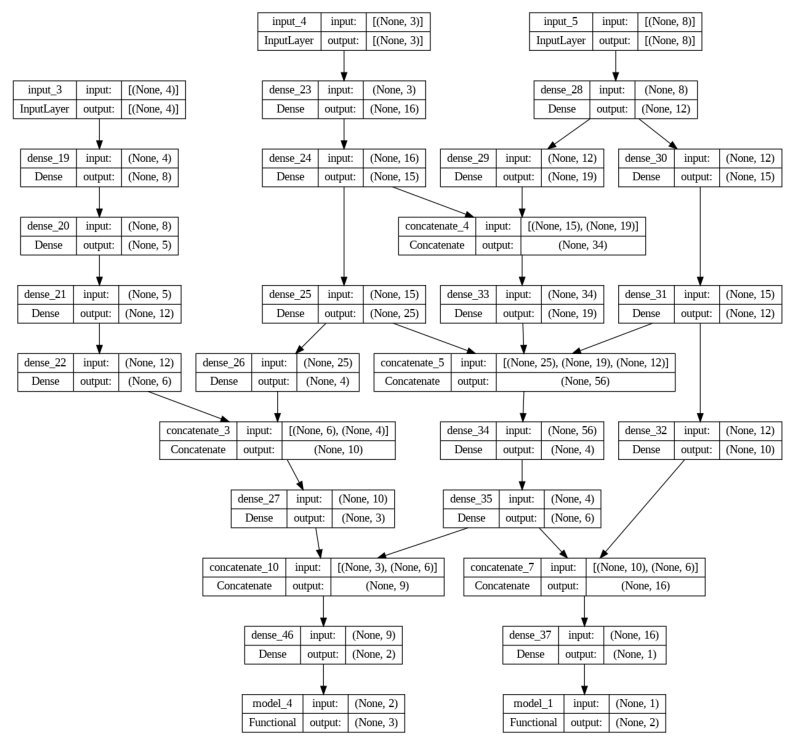

In [15]:
# Graficar la arquitectura de la red
plot_model(final_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Mostrar la imagen del modelo usando matplotlib
image = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()